# GETTING TO KNOW THE DATASET

In [16]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,18)
pd.options.mode.chained_assignment = None

In [3]:
# read the data
df = pd.read_csv('train.csv')

In [5]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [7]:
# selecting the numeric columns
df_numeric = df.select_dtypes(exclude=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


In [9]:
# select the non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'water_1line'
 'big_road1_1line' 'railroad_1line' 'ecology']


# MISSING DATA

# # TECHNIQUE 1: missing data heatmap- suitable for small sized datasets

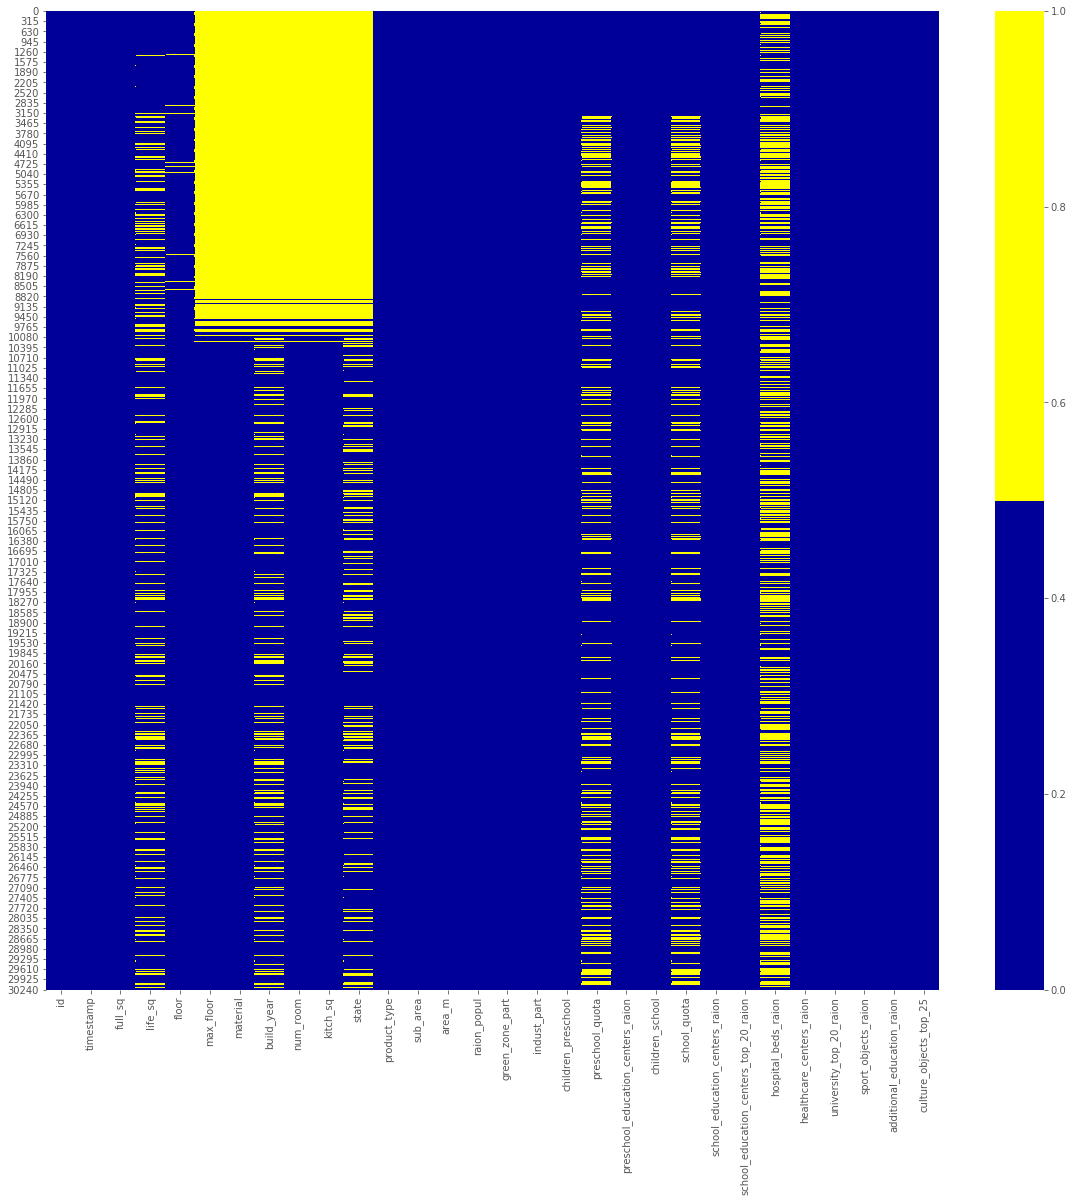

In [18]:
# take a look at the first 30 columns with all rows
cols = df.columns[:30] # first 30 cols
colours = ['#000099', '#ffff00'] # specify the colours - yellow means missing, blues means not missing
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

# # TECHNIQUE 2- missing data percentage list- suitable for large number of columns

In [11]:
# if it is a larger dataset and the visualisation takes too long, we can do this.
# fing the % for each feature.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

# # TECHNIQUE 3- MISSING DATA HISTOGRAM- suitable for many features

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

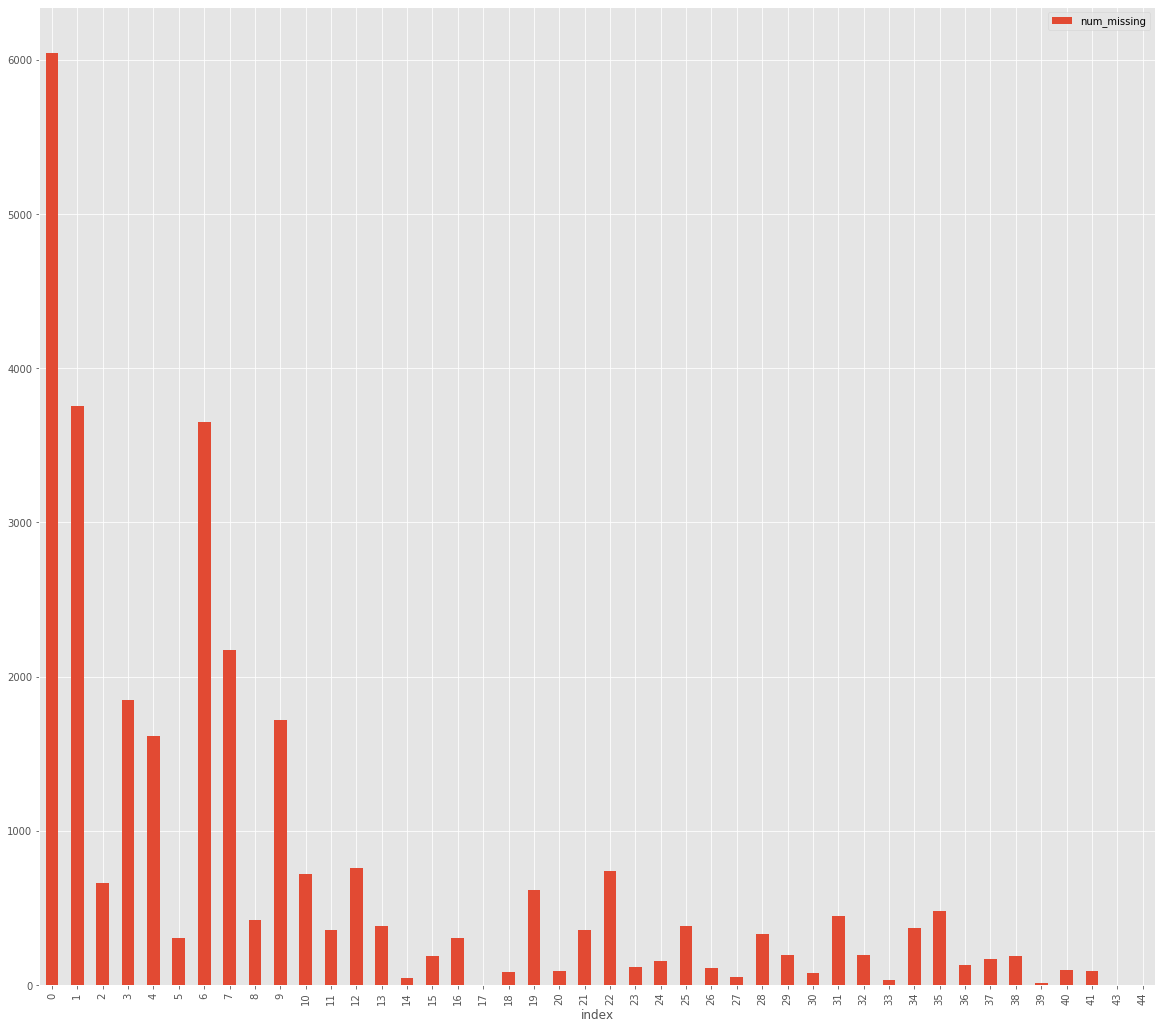

In [17]:
# first create missing indicator for features within missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y = 'num_missing')